In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load data from CSV file
data = pd.read_csv('country_wise_latest.csv')
data

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [11]:
print(data.head())
print(data.info())

  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1   

In [17]:
data.dtypes[data.dtypes == 'int64']

Confirmed              int64
Deaths                 int64
Recovered              int64
Active                 int64
New cases              int64
New deaths             int64
New recovered          int64
Confirmed last week    int64
1 week change          int64
dtype: object

In [18]:
data.isnull().any()

Country/Region            False
Confirmed                 False
Deaths                    False
Recovered                 False
Active                    False
New cases                 False
New deaths                False
New recovered             False
Deaths / 100 Cases        False
Recovered / 100 Cases     False
Deaths / 100 Recovered    False
Confirmed last week       False
1 week change             False
1 week % increase         False
WHO Region                False
dtype: bool

In [23]:
data_original= data[data['Country/Region'].isin(['US', 'India'])][['Country/Region', 'Confirmed','Recovered']]
data_original = data_original.set_index('Country/Region')
data_original

,Confirmed,Recovered
Country/Region,,
India,1480073,951166
US,4290259,1325804


<Axes: xlabel='Country/Region'>

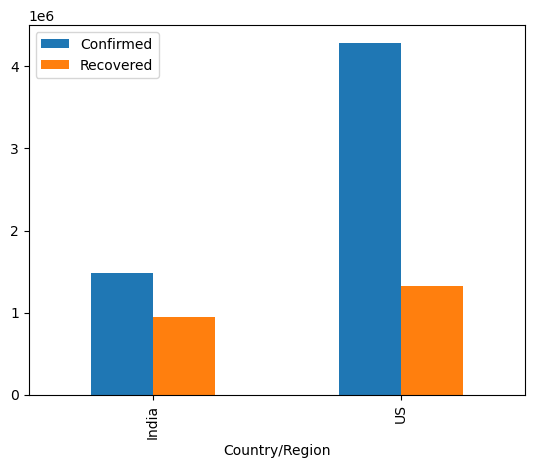

In [24]:
data_new.plot.bar()

In [25]:
data_new = data[['Country/Region', 'New cases', 'New deaths', 'New recovered']]
data_new

,Country/Region,New cases,New deaths,New recovered
0,Afghanistan,106,10,18
1,Albania,117,6,63
2,Algeria,616,8,749
3,Andorra,10,0,0
4,Angola,18,1,0
...,...,...,...,...
182,West Bank and Gaza,152,2,0
183,Western Sahara,0,0,0
184,Yemen,10,4,36
185,Zambia,71,1,465


In [26]:
Country_based_new_case = data_new.groupby('Country/Region')['New cases'].sum()
Country_based_new_case

Country/Region
Afghanistan           106
Albania               117
Algeria               616
Andorra                10
Angola                 18
                     ... 
West Bank and Gaza    152
Western Sahara          0
Yemen                  10
Zambia                 71
Zimbabwe              192
Name: New cases, Length: 187, dtype: int64

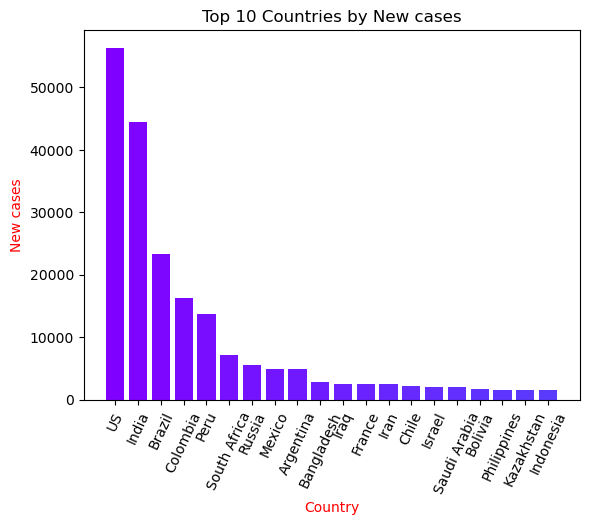

In [37]:
Top_10_countries = Country_based_new_case.sort_values(ascending=False).head(20)
colors = plt.cm.rainbow(range(len(Top_10_countries)))
plt.bar(Top_10_countries.index, Top_10_countries.values,color=colors)
plt.xlabel('Country',color='r')
plt.ylabel('New cases',color='r')
plt.title('Top 10 Countries by New cases')
plt.xticks(rotation=65)
plt.show()

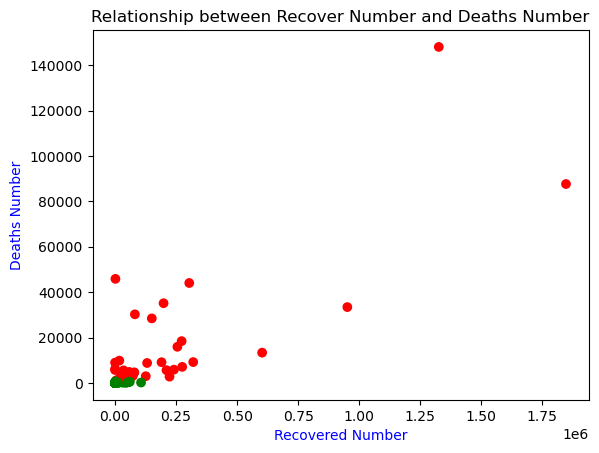

In [41]:
import numpy as np
Recovered_number=data['Recovered']
Deaths_number=data['Deaths']
Recovered_number = np.array(Recovered_number)
Deaths_number = np.array(Deaths_number)
color_map = np.where(Deaths_number < 1000, 'green', 'red')
plt.scatter(Recovered_number, Deaths_number, color=color_map)
x_label = plt.xlabel('Recovered Number')
x_label.set_color('blue')
y_label = plt.ylabel('Deaths Number')
y_label.set_color('blue')
plt.title('Relationship between Recover Number and Deaths Number')
plt.show()


In [42]:
data[data.Deaths<100]
data_2=data[~(data.Deaths<100)]
data_2

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
179,Uzbekistan,21209,121,11674,9414,678,5,569,0.57,55.04,1.04,17149,4060,23.67,Europe
180,Venezuela,15988,146,9959,5883,525,4,213,0.91,62.29,1.47,12334,3654,29.63,Americas
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
